# Conservation of Cell Cylce effect
Before vs. after integration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import scIB

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
import warnings
warnings.filterwarnings('ignore')

scanpy==1.4.4+40.gbd5f862 anndata==0.6.22.post1 umap==0.3.9 numpy==1.17.0 scipy==1.3.1 pandas==0.25.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
plt.rcParams['figure.figsize'] = 8,8

In [4]:
adata_file = "/storage/groups/ml01/workspace/group.daniela/MCA_normalised/Lung.h5ad"
#adata_file = "/storage/groups/ml01/workspace/group.daniela/tm/facs/norm/Limb_Muscle_raw.h5ad"

In [5]:
adata = sc.read(adata_file, cache=True)

## Visualisation and Clustering

In [9]:
scIB.preprocessing.reduce_data(adata, hvg=True, batch='tissue', pca=True, umap=True)
sc.tl.louvain(adata, resolution=0.5, key_added='louvain')

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

Number of highly variable genes: 4000
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:10)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:47)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


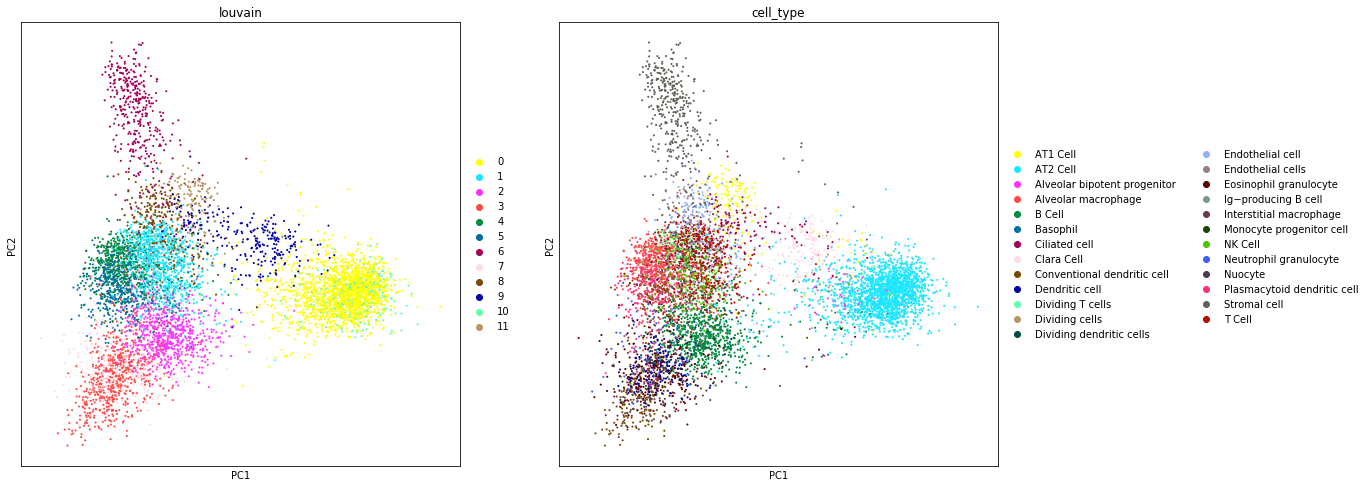

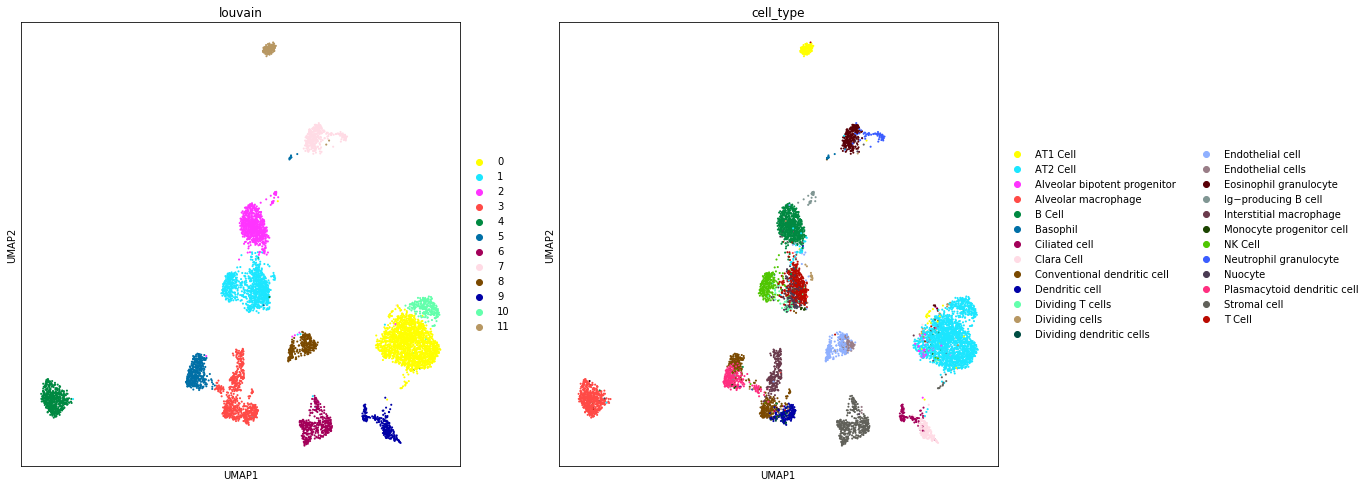

In [10]:
sc.pl.pca(adata, color=['louvain', 'cell_type'], palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color=['louvain', 'cell_type'], palette=sc.pl.palettes.godsnot_64)

## Compute cell cycle scores

Using Tirosh et al. cell cycle marker genes

In [11]:
marker_gene_file = '../data/regev_lab_cell_cycle_genes.txt'

## Cell cycle effect

In [12]:
adata.obs.columns

Index(['batch', 'tissue', 'barcode', 'cell_type', 'marker_gene', 'n_counts',
       'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'louvain'],
      dtype='object')

In [13]:
s_genes, g2m_genes = scIB.preprocessing.cc_tirosh(marker_gene_file)
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs) (0:00:06)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs) (0:00:09)
-->     'phase', cell cycle phase (adata.obs)


... storing 'phase' as categorical


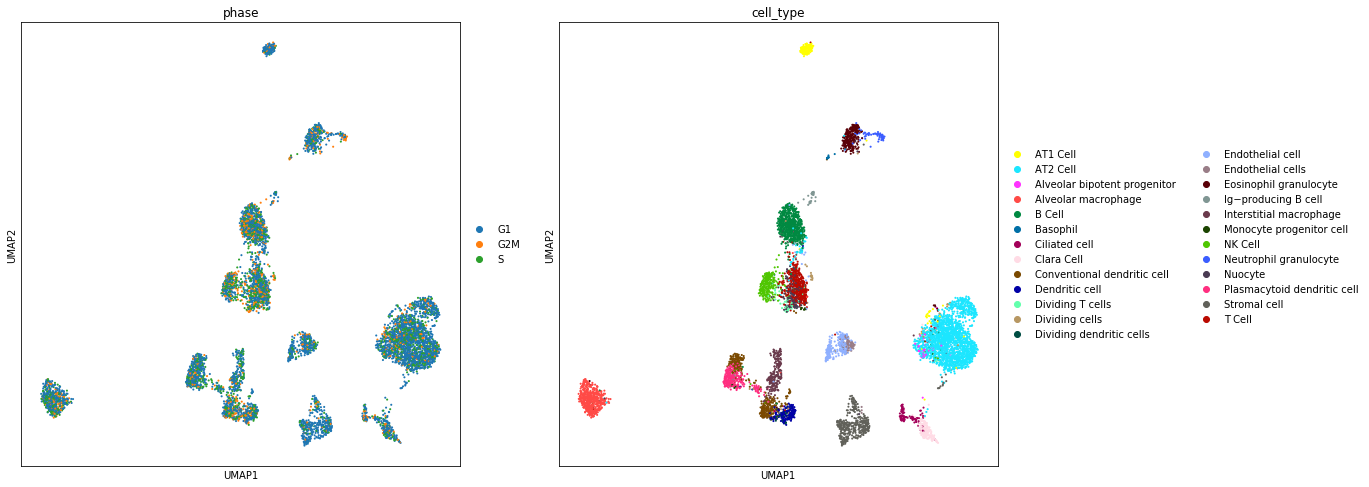

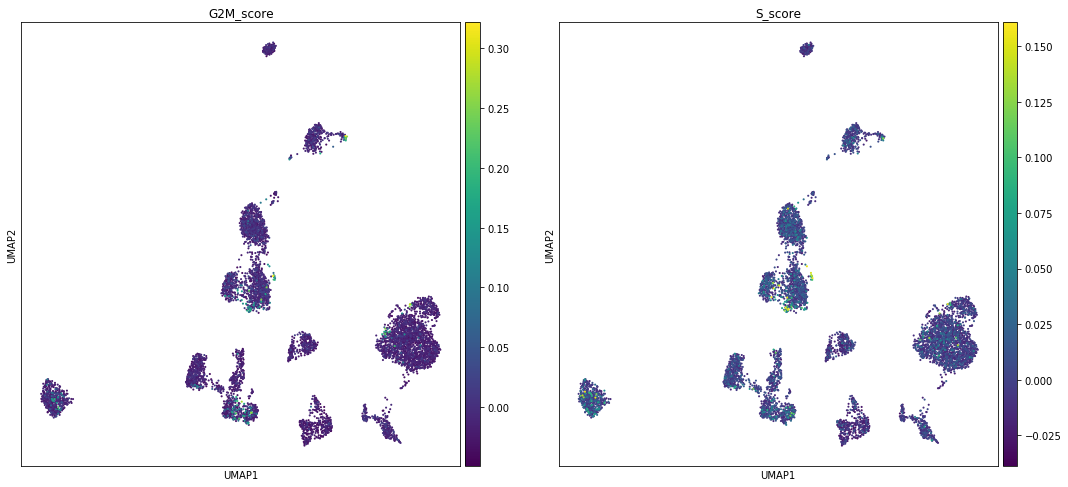

In [14]:
sc.pl.umap(adata, color=['phase', 'cell_type'])
sc.pl.umap(adata, color=['G2M_score', 'S_score'])

In [15]:
scIB.metrics.measureTM(scIB.metrics.pcr_comparison,
                       adata, adata.layers['counts'], adata.X, covariate="phase")

subsetting to 4000 highly variable genes
covariate: phase
matrix dimensions: (6940, 4000)
computing PCA with n_comps = 4000
    finished (0:00:41)
importing data to R
PC regression
matrix dimensions: (6940, 4000)
computing PCA with n_comps = 4000
    finished (0:00:53)
importing data to R
PC regression
memory usage:1425.0 MB
runtime: 279.0 s


(1425.15625, 278.87792300000007, (-0.11642567185653352,))

In [16]:
scIB.metrics.measureTM(scIB.metrics.kBET_comparison,
                       adata, adata.layers['counts'], adata.X, covariate="phase")

covariate: phase
importing count matrix


NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'tuple'>'

In [19]:
matrix = adata.X
sc.pp.subsample(matrix, fraction=0.3, random_state=0)

(<2082x21665 sparse matrix of type '<class 'numpy.float64'>'
 	with 1210993 stored elements in Compressed Sparse Row format>,
 array([5468, 2527, 5623, ..., 5882, 5783, 4126]))